In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
#读入数据
data = np.loadtxt('ex2data1.txt', delimiter=',')
data = np.insert(data, 0, 1, 1)

In [3]:
#初始化数据
cols = data.shape[1]
X = data[:,0:cols-1]
y = data[:, cols-1].reshape(len(X), 1)
#y = data[:, cols-1]
theta = np.zeros(cols-1)
m = len(X)

In [4]:
pos = data[np.isin(data[:,cols-1], [1])]
neg = data[np.isin(data[:,cols-1], [0])]

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def computeCost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    c1=np.multiply(y, np.log(sigmoid(X*theta.T)))
    c2=np.multiply((1-y), np.log(1-sigmoid(X*theta.T)))
    return -np.sum(c1+c2)/(len(X))

In [7]:
print(computeCost(theta, X,y))

0.6931471805599453


In [8]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    grad = np.zeros(theta.shape[1])
    error = sigmoid(np.dot(X, theta.T)) - y

    
    for i in range(theta.shape[1]):
        grad[i] = np.sum(np.multiply(error,X[:,i].reshape(len(X),1)))/len(X)
    return grad

In [9]:
#print(gradient(X, y, theta))
result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X, y))
print(result)
print(computeCost(result[0], X, y))

(array([-25.16131876,   0.20623159,   0.20147149]), 36, 0)
0.20349770158947397


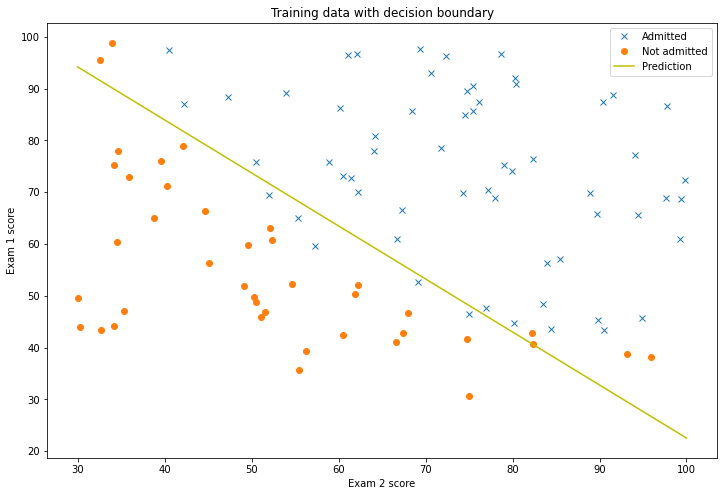

In [10]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = ( - result[0][0] - result[0][1] * plotting_x1) / result[0][2]

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(pos[:,1], pos[:,2], 'x', label='Admitted')
ax.plot(neg[:,1], neg[:,2], 'o', label='Not admitted')
ax.plot(plotting_x1, plotting_h1, 'y', label='Prediction')
ax.legend()
ax.set_ylabel('Exam 1 score')
ax.set_xlabel('Exam 2 score')
ax.set_title('Training data with decision boundary')
plt.show()

In [11]:
def hfunc1(theta, X):
    X.insert(0, 1)
    return sigmoid(np.dot(X, theta.T))
hfunc1(result[0],[45,85])

0.7762906252339148

In [12]:
# 定义预测函数
def predict(theta, X):
    probability = sigmoid(np.dot(X, theta.T))
    return [1 if x >= 0.5 else 0 for x in probability]

In [13]:
# 统计预测正确率
predictions = predict(result[0], X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%
